In [7]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os

df = pd.read_csv("Staphylococcus_aureus_Infection_Data.csv")



In [8]:
# Checking for missing values
df.isna().sum()

#                    0
AGE_GRP             29
ThirtyDay_Death    616
SixWeek_Death      616
ThreeMo_Death      616
                  ... 
Protein 2089         0
Protein 2090         0
Protein 2091         0
Protein 2092         0
Protein 2093         0
Length: 2102, dtype: int64

In [9]:
#Drop all rows missing attributes, leaves us with 5547 instances
df2 = df.dropna() 
df2.drop(['#','ThirtyDay_Death','SixWeek_Death','ThreeMo_Death','SixMo_Death','NineMo_Death'], axis='columns', inplace=True)
print(df2)

     AGE_GRP OneYear_Death  Charlson_WIC  Protein 1  Protein 2  Protein 3  \
1      51-60         False           0.0   0.216912  -0.150886  -0.038081   
2      51-60         False           2.0   0.000000  -0.701414  -0.354478   
3      71-80          True           4.0   0.224415  -0.053709  -0.025547   
4      61-70         False           5.0  -0.080960  -0.480949  -0.345807   
5      51-60         False           1.0   0.013984  -0.350237  -0.163590   
...      ...           ...           ...        ...        ...        ...   
6182   00-10         False           0.0   0.191297  -0.282302  -0.086869   
6183   51-60         False           0.0  -0.091525  -0.369944  -0.280567   
6184   61-70          True           9.0   0.131185  -0.507178  -0.341122   
6185   00-10         False           0.0  -0.034182  -0.233550  -0.491791   
6186   51-60          True           5.0   0.000000  -0.459694  -0.301578   

      Protein 4  Protein 5  Protein 6  Protein 7  ...  Protein 2084  \
1   

c:\Users\monke\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
df2= df2.replace('00-10', 00).replace('20-Nov', 11).replace('21-30', 21).replace('31-40', 31).replace('41-50', 41).replace('51-60', 51).replace('61-70', 61).replace('71-80', 71).replace('80+', 80)
print(df2)
display(df2.loc[1:8])

      AGE_GRP  OneYear_Death  Charlson_WIC  Protein 1  Protein 2  Protein 3  \
1          51          False           0.0   0.216912  -0.150886  -0.038081   
2          51          False           2.0   0.000000  -0.701414  -0.354478   
3          71           True           4.0   0.224415  -0.053709  -0.025547   
4          61          False           5.0  -0.080960  -0.480949  -0.345807   
5          51          False           1.0   0.013984  -0.350237  -0.163590   
...       ...            ...           ...        ...        ...        ...   
6182        0          False           0.0   0.191297  -0.282302  -0.086869   
6183       51          False           0.0  -0.091525  -0.369944  -0.280567   
6184       61           True           9.0   0.131185  -0.507178  -0.341122   
6185        0          False           0.0  -0.034182  -0.233550  -0.491791   
6186       51           True           5.0   0.000000  -0.459694  -0.301578   

      Protein 4  Protein 5  Protein 6  Protein 7  .

,AGE_GRP,OneYear_Death,Charlson_WIC,Protein 1,Protein 2,Protein 3,Protein 4,Protein 5,Protein 6,Protein 7,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
1,51,False,0.0,0.216912,-0.150886,-0.038081,0.069588,0.336442,-0.104392,0.008110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,51,False,2.0,0.000000,-0.701414,-0.354478,0.135928,-0.349327,-0.003024,-0.098326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,71,True,4.0,0.224415,-0.053709,-0.025547,0.061783,-0.046513,-0.105150,0.096859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,61,False,5.0,-0.080960,-0.480949,-0.345807,0.360044,-0.355281,0.213266,-0.156073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,51,False,1.0,0.013984,-0.350237,-0.163590,-0.095393,0.161053,-0.008987,-0.123618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,11,False,0.0,0.248003,-0.565065,-0.364494,0.200150,-0.289090,-0.100462,-0.234777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,61,False,9.0,0.036360,1.093584,0.957560,0.006924,-0.360577,-0.088412,-0.139138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8,41,False,3.0,0.066131,0.254546,0.306890,-0.122117,-0.112675,-0.009072,0.156745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [11]:
x=df2.iloc[:, df2.columns != 'OneYear_Death']
y=df2.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)


In [12]:
for i in range(63,64):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    knn_score= knn.score(X_test,y_test)
    print(i)
    print(knn_score)
    
#Tested 1-100 neighbors, highest score from 63.

63
0.7504504504504504


<AxesSubplot:>

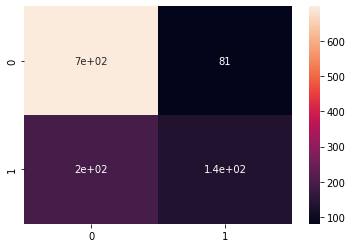

In [14]:
y_pred=knn.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True)
